In [28]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve 

In [79]:
# loading data
df = pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,NaN,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.shape

(200, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           192 non-null    object 
 3   Cholesterol  193 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<AxesSubplot:title={'center':'Count of Drug'}, xlabel='Drug', ylabel='count'>

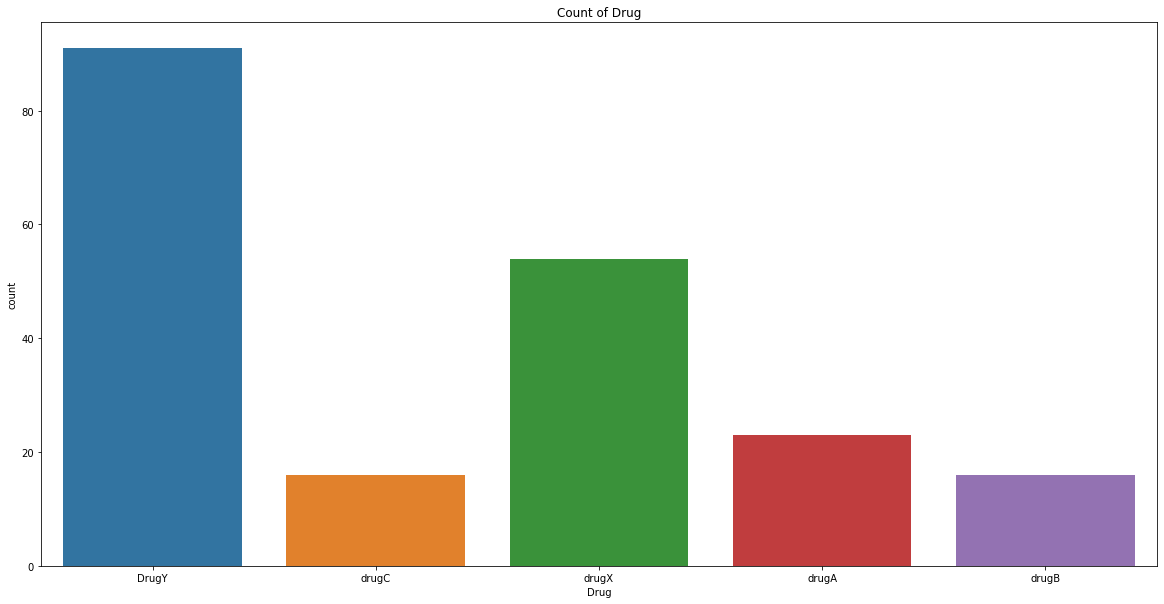

In [12]:
plt.figure(figsize=(20,10))
plt.title('Count of Drug')
sns.countplot(data=df,x='Drug')

<AxesSubplot:title={'center':'Histogram of Age'}, xlabel='Age', ylabel='Count'>

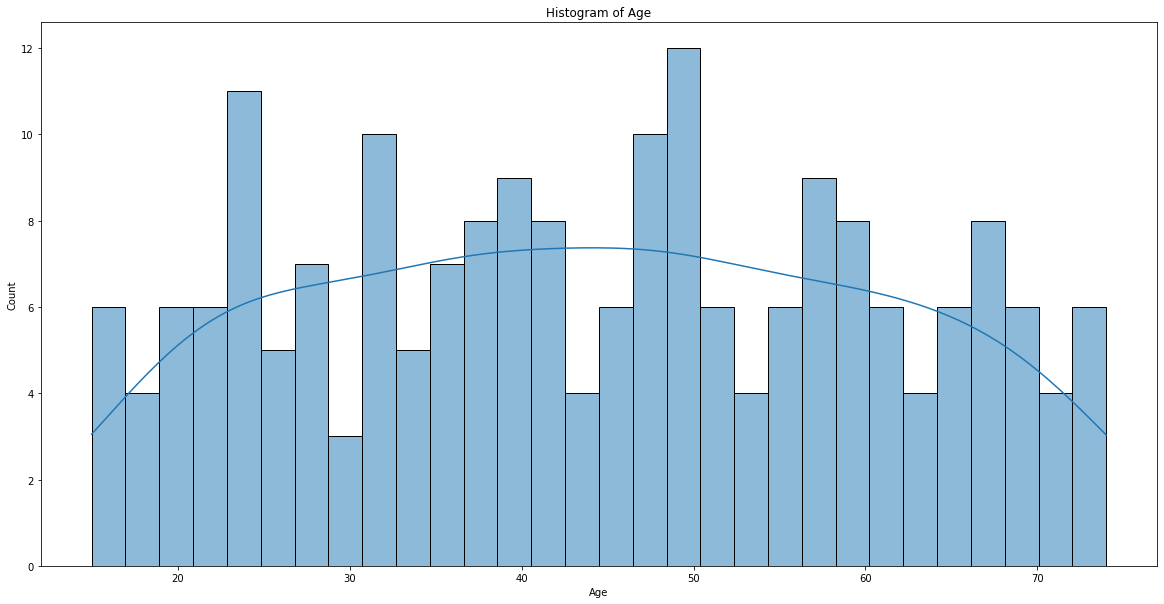

In [13]:
plt.figure(figsize=(20,10))
plt.title('Histogram of Age')
sns.histplot(data=df,x='Age',bins=30, kde=True)

<AxesSubplot:title={'center':'Count of Sex'}, xlabel='Sex', ylabel='count'>

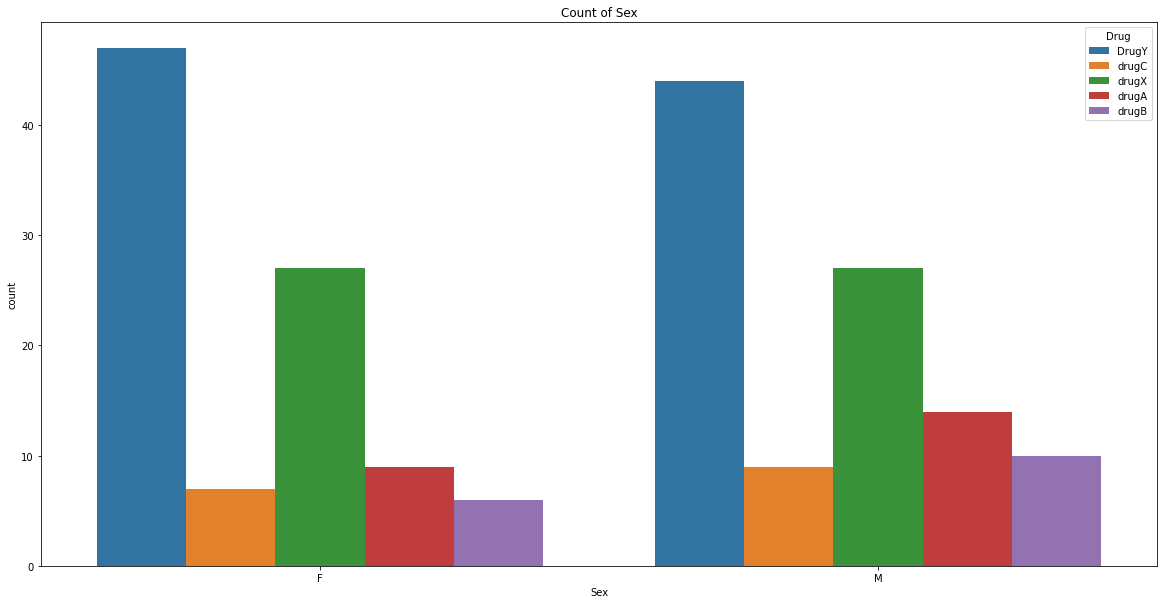

In [14]:
plt.figure(figsize=(20,10))
plt.title('Count of Sex')
sns.countplot(data=df,x='Sex', hue='Drug')

<AxesSubplot:title={'center':'Count of BP'}, xlabel='BP', ylabel='count'>

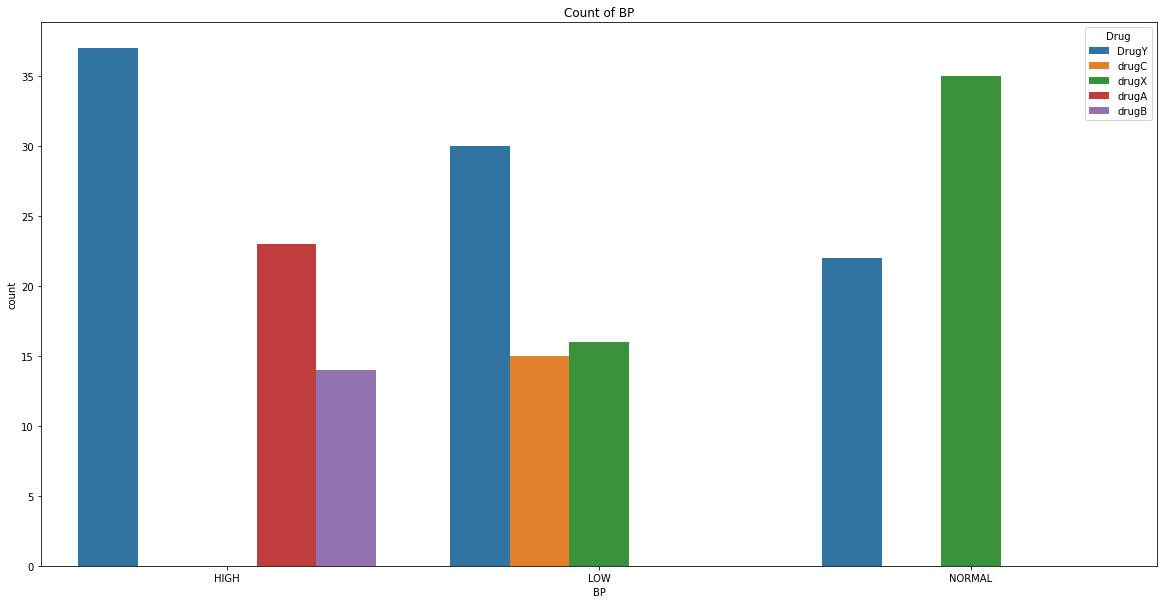

In [15]:
plt.figure(figsize=(20,10))
plt.title('Count of BP')
sns.countplot(data=df,x='BP', hue='Drug')

<AxesSubplot:title={'center':'Count of Cholesterol'}, xlabel='Cholesterol', ylabel='count'>

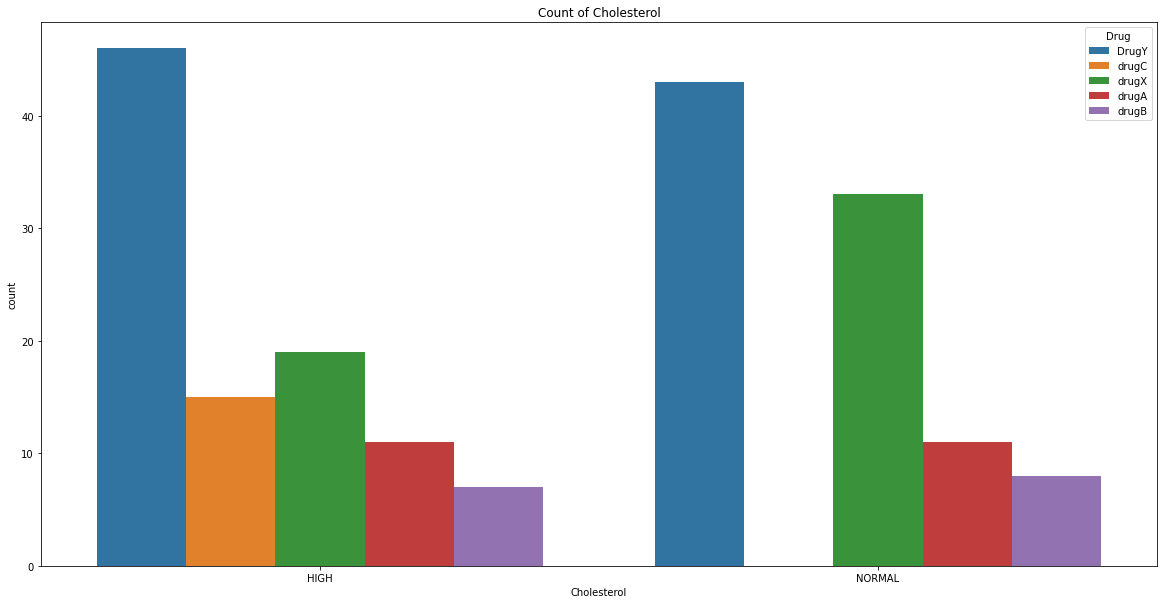

In [16]:
plt.figure(figsize=(20,10))
plt.title('Count of Cholesterol')
sns.countplot(data=df,x='Cholesterol', hue='Drug')

<AxesSubplot:title={'center':'Plot of Age vs Potassium vs Drugs'}, xlabel='Age', ylabel='Na_to_K'>

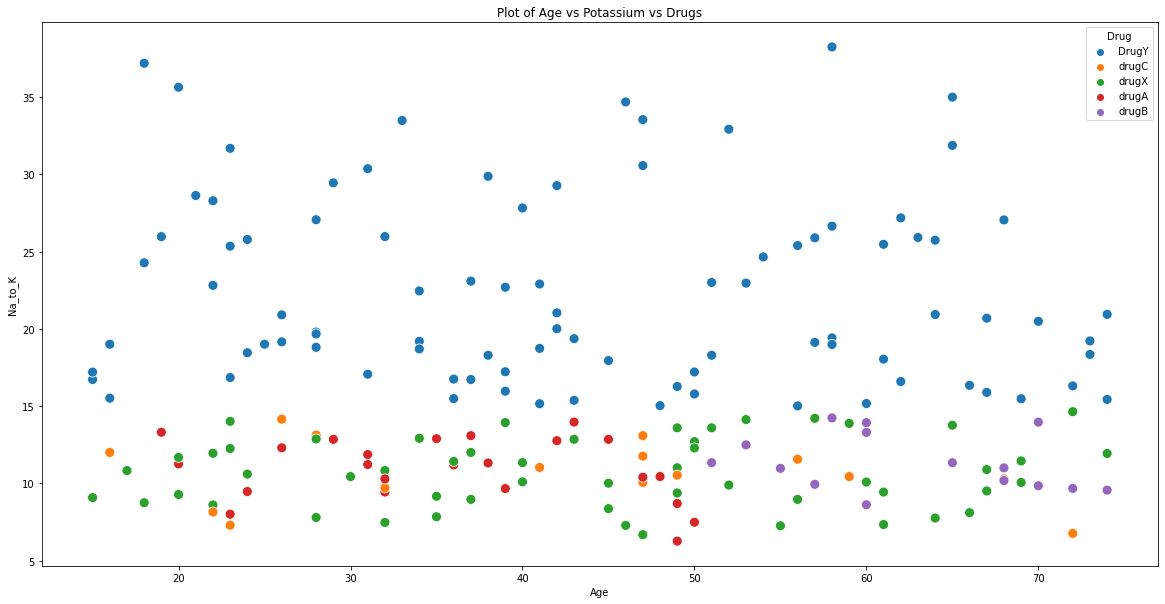

In [17]:
plt.figure(figsize=(20,10))
plt.title('Plot of Age vs Potassium vs Drugs')
sns.scatterplot(data=df,x='Age', y='Na_to_K', hue='Drug',s=100)

In [101]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [104]:
X = pd.get_dummies(X, drop_first= True)

In [20]:
X

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
model = DecisionTreeClassifier()

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
model.score(X_test, y_test)

0.95

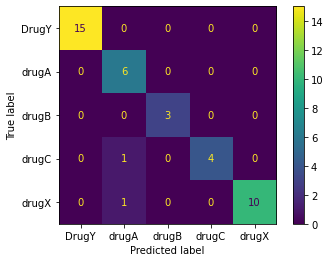

In [29]:
plot_confusion_matrix(model, X_test, y_test)

In [80]:
X = df.drop('Age', axis=1)
y = df['Age']

In [81]:
X = pd.get_dummies(X, drop_first= True)

In [82]:
X

,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,25.355,0,0,0,0,0,0,0,0
1,13.093,1,1,0,0,0,0,1,0
2,10.114,1,1,0,0,0,0,1,0
3,7.798,0,0,1,0,0,0,0,1
4,18.043,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
195,11.567,0,1,0,0,0,0,1,0
196,12.006,1,1,0,0,0,0,1,0
197,9.894,1,0,1,0,0,0,0,1
198,14.020,1,0,1,1,0,0,0,1


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [86]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, BayesianRidge

In [87]:
models = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression' : LogisticRegression(),
    'Ridge': Ridge(alpha=1.0, max_iter=1000),
    'Lasso' : Lasso(),
    'Bayesian Ridge' : BayesianRidge()
}

In [88]:
baseline_model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [89]:
baseline_model_scores.sort_values('Score')

,Score
Logistic Regression,0.050000
Lasso,0.077533
Bayesian Ridge,0.125251
Ridge,0.170169
Linear Regression,0.171523


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Lasso'),
  Text(2, 0, 'Bayesian Ridge'),
  Text(3, 0, 'Ridge'),
  Text(4, 0, 'Linear Regression')])

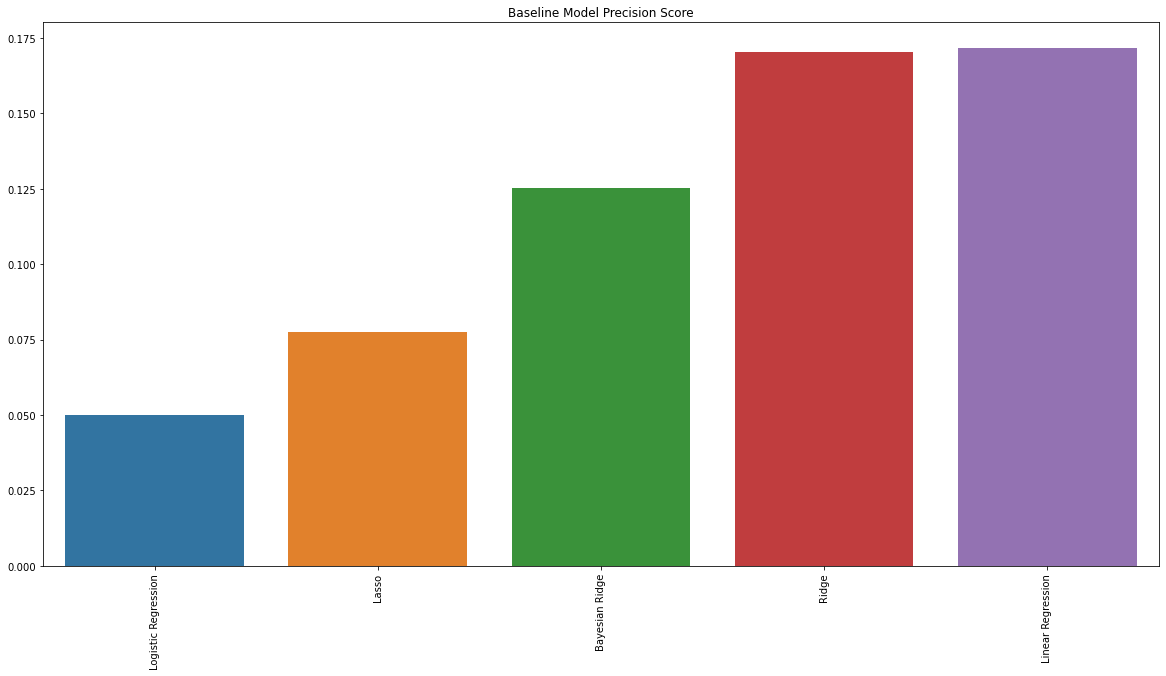

In [90]:
plt.figure(figsize=(20,10))
sns.barplot(data=baseline_model_scores.sort_values('Score').T)
plt.title('Baseline Model Precision Score')
plt.xticks(rotation=90)

In [92]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_X = df.copy()
list = ['Sex','BP','Cholesterol', 'Drug']
for col in list:
    label_X[col] = label_encoder.fit_transform(df[col])

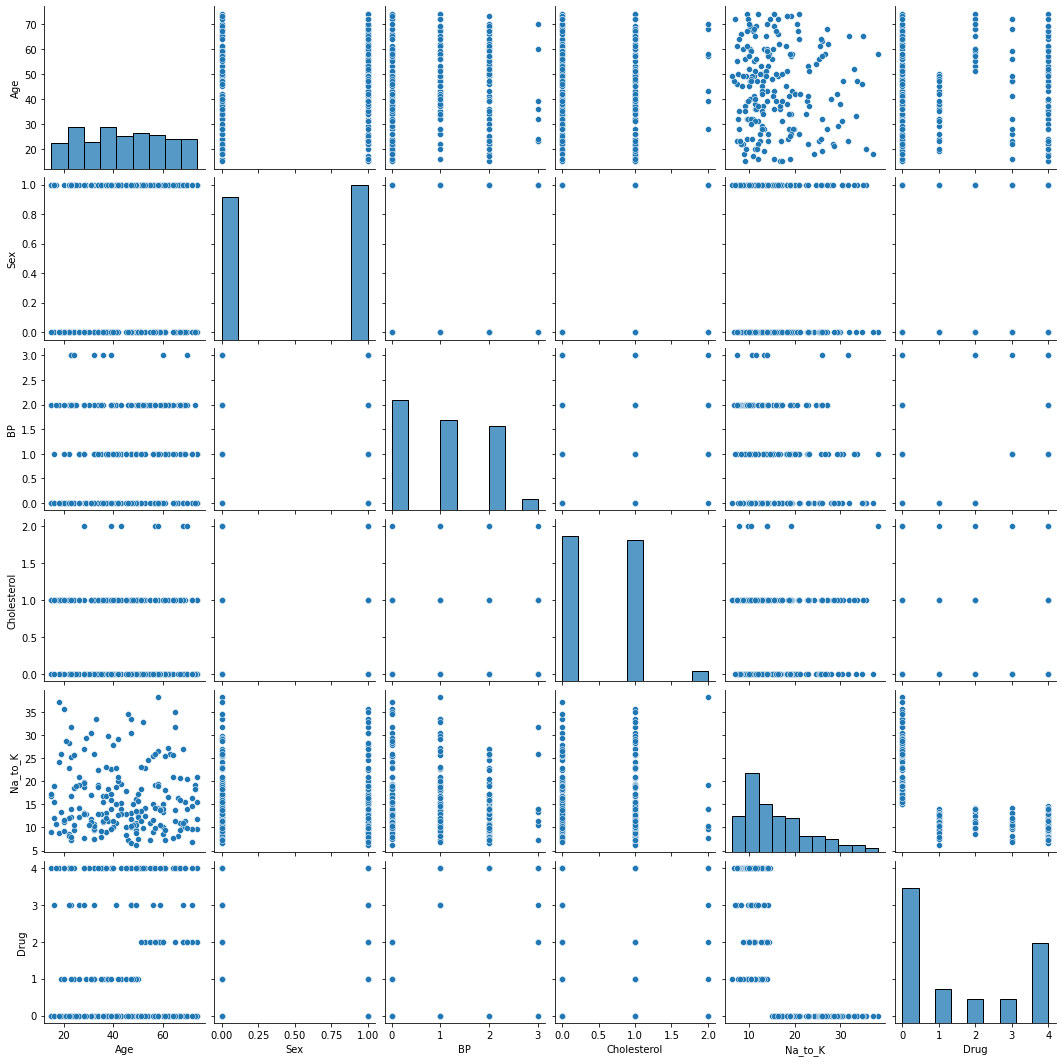

In [93]:
sns.pairplot(label_X)

## Because there is no correlation between the variables we can't have a good Regression model.

In [113]:
dummy_test_data = X.iloc[24:27,:]
dummy_result_data = y.iloc[24:27]

In [114]:
dummy_test_data

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
24,33,33.486,0,1,0,0
25,28,18.809,0,0,0,1
26,31,30.366,1,0,0,0


In [115]:
result = model.predict(dummy_test_data)

In [116]:
result_tuple = tuple(result)

In [117]:
print(result_tuple)

('DrugY', 'DrugY', 'DrugY')


In [118]:
dummy_result_data

24    DrugY
25    DrugY
26    DrugY
Name: Drug, dtype: object